<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Подключение-необходимых-библиотек-и-загрузка-данных" data-toc-modified-id="Подключение-необходимых-библиотек-и-загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подключение необходимых библиотек и загрузка данных</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка признаков</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Upsampling-и-downsampling" data-toc-modified-id="Upsampling-и-downsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsampling и downsampling</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Итоговый вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Увеличилось ежемесячное количество клиентов, ушедших из банка. Сохранить существующих клиентов дешевле, чем привлекать новых.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Цели и задачи:**
- Проанализировать исторические данные о поведении клиентов банка, расторжении договоров. Спрогнозировать уход клиента из банка.
- Построить модель классификации, метрика качества f1 (минимальное значение 0.59)
- Измерить AUC-ROC, сравнить её значение с f1-мерой.

**Описание данных:**

Данные находятся в файле /datasets/Churn.csv.

Признаки:
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

Целевой признак
- Exited — факт ухода клиента

## Подготовка данных

### Подключение необходимых библиотек и загрузка данных

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, r2_score
from sklearn.utils import shuffle

In [31]:
data = pd.read_csv('/datasets/Churn.csv')
display(data.head(10))
data.info()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Видим, что в колонке Tenure отсутствует около 10% данных. Далее решим, что с этим делать

Посмотрим, есть ли дубликаты в данных

In [32]:
data.duplicated().sum()

0

### Подготовка признаков

1) Удалим признаки RowNumber, CustomerId и Surname, т.к. не несут в себе информации, необходимой для решения задач, поставленных в проекте.

In [33]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

2) Посмотрим на распределения числовых признаков

In [34]:
numerics = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

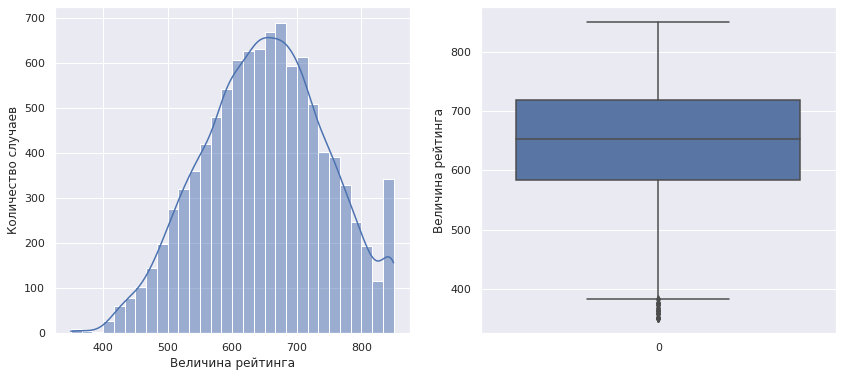

In [35]:
sns.set_theme()
f, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].set_xlabel('Величина рейтинга')
axes[0].set_ylabel('Количество случаев')
sns.histplot(data['CreditScore'], bins=30, kde=True, ax=axes[0])
axes[1].set_ylabel('Величина рейтинга')
sns.boxplot(data=data['CreditScore'], ax=axes[1])
plt.show()

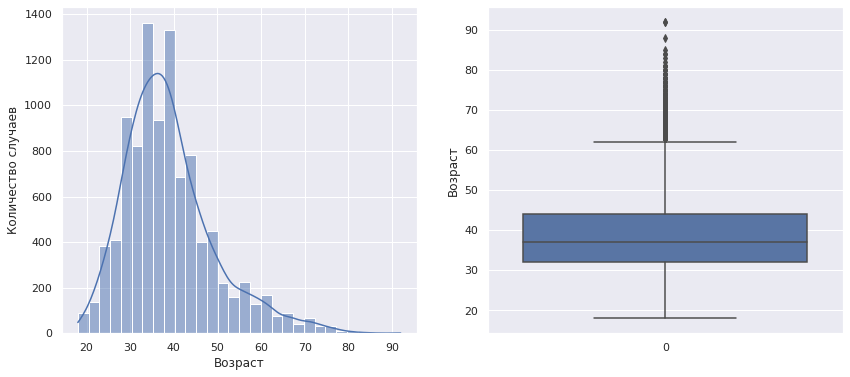

In [36]:
sns.set_theme()
f, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Количество случаев')
sns.histplot(data['Age'], bins=30, kde=True, ax=axes[0])
axes[1].set_ylabel('Возраст')
sns.boxplot(data=data['Age'], ax=axes[1])
plt.show()

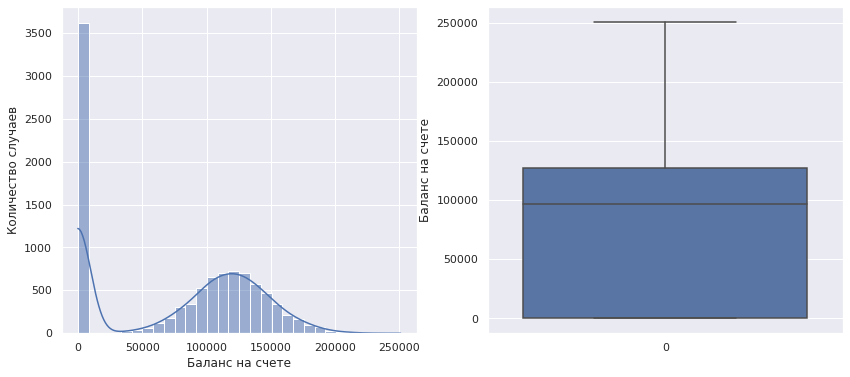

In [37]:
sns.set_theme()
f, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].set_xlabel('Баланс на счете')
axes[0].set_ylabel('Количество случаев')
sns.histplot(data['Balance'], bins=30, kde=True, ax=axes[0])
axes[1].set_ylabel('Баланс на счете')
sns.boxplot(data=data['Balance'], ax=axes[1])
plt.show()

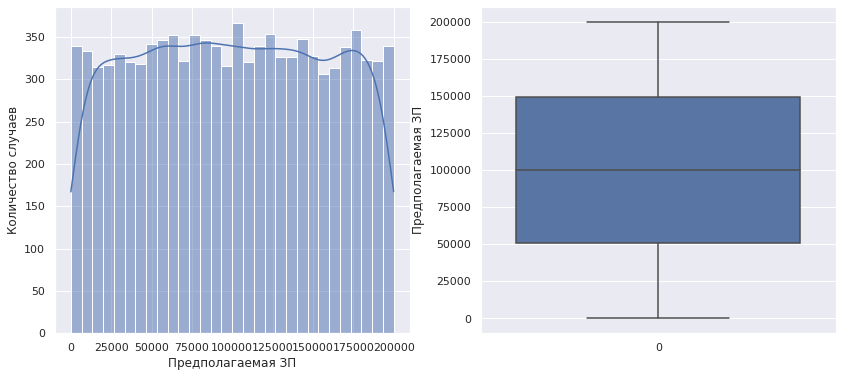

In [38]:
sns.set_theme()
f, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].set_xlabel('Предполагаемая ЗП')
axes[0].set_ylabel('Количество случаев')
sns.histplot(data['EstimatedSalary'], bins=30, kde=True, ax=axes[0])
axes[1].set_ylabel('Предполагаемая ЗП')
sns.boxplot(data=data['EstimatedSalary'], ax=axes[1])
plt.show()

3) Т.к. масштаб данных разных, нам необходимо применить масштабирование с помощью StandardScaler библиотеки sklearn к числовым признакам CreditScore, Age, Balance, EstimatedSalary.

In [39]:
scaler = StandardScaler()
data[numerics] = scaler.fit_transform(data[numerics])

In [40]:
#убедимся, что все сработало
data.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,Female,0.293517,2.0,-1.225848,1,1,1,0.021886,1
1,-0.440036,Spain,Female,0.198164,1.0,0.117350,1,0,1,0.216534,0
2,-1.536794,France,Female,0.293517,8.0,1.333053,3,1,0,0.240687,1
3,0.501521,France,Female,0.007457,1.0,-1.225848,2,0,0,-0.108918,0
4,2.063884,Spain,Female,0.388871,2.0,0.785728,1,1,1,-0.365276,0


4) Посмотрим на распределения категориальных признаков.

In [41]:
categoricals = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


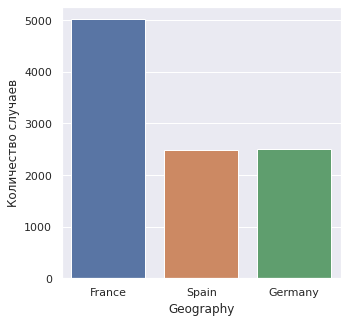

In [42]:
figure(figsize=(5,5))
sns.countplot(data['Geography'])
plt.xlabel('Geography')
plt.ylabel('Количество случаев')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


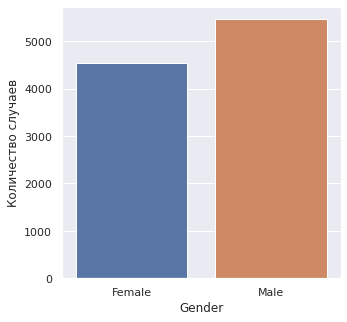

In [43]:
figure(figsize=(5,5))
sns.countplot(data['Gender'])
plt.xlabel('Gender')
plt.ylabel('Количество случаев')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


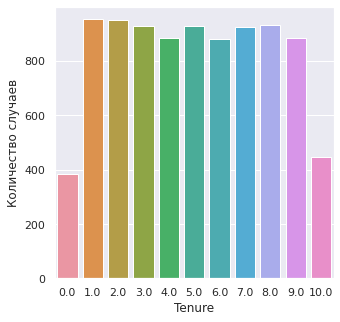

In [44]:
figure(figsize=(5,5))
sns.countplot(data['Tenure'])
plt.xlabel('Tenure')
plt.ylabel('Количество случаев')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


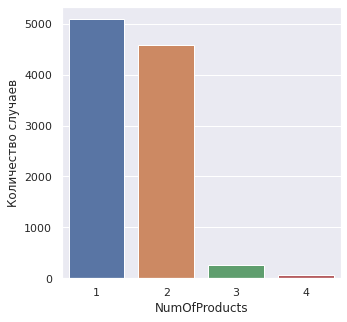

In [45]:
figure(figsize=(5,5))
sns.countplot(data['NumOfProducts'])
plt.xlabel('NumOfProducts')
plt.ylabel('Количество случаев')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


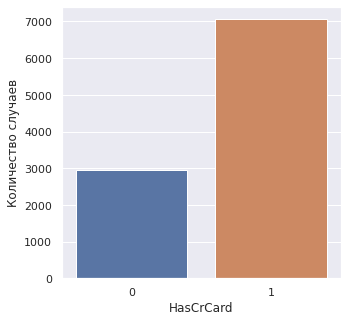

In [46]:
figure(figsize=(5,5))
sns.countplot(data['HasCrCard'])
plt.xlabel('HasCrCard')
plt.ylabel('Количество случаев')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


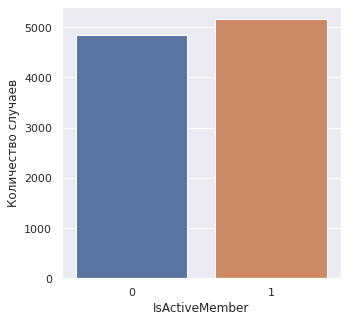

In [47]:
figure(figsize=(5,5))
sns.countplot(data['IsActiveMember'])
plt.xlabel('IsActiveMember')
plt.ylabel('Количество случаев')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


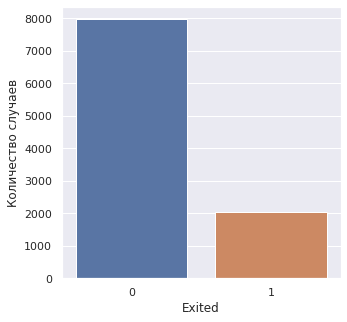

In [48]:
figure(figsize=(5,5))
sns.countplot(data['Exited'])
plt.xlabel('Exited')
plt.ylabel('Количество случаев')
plt.show()

- Целевой признак Exited распределён примерно 4:1.
- Количество категорий в признаках Geography, Gender небольшое. Преобразуем их методом One-Hot Encoding.

In [49]:
# для преобразования воспользуемся методом pd.get_dummies
data = pd.get_dummies(data, drop_first=True)

5) Устраним пропуски в колонке Tenure

In [50]:
data.loc[data['Tenure'].isna(), 'Tenure'] = -1
data['Tenure'] = data['Tenure'].astype('int64')

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Age                10000 non-null  float64
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(4), int64(5), uint8(3)
memory usage: 732.5 KB


**Выводы**

- Данные успешно загружены и проверены на соответствие описанию. Дубликатов нет. Типы данных преобразованы в соответствии с хранимой информацией
- Признаки RowNumber, CustomerId и Surname удалены, так как целевой признак от них никак не зависит
- Были рассмотрены распределения признаков
- Числовые признаки приведены к стандартному виду методом StandardScaler (среднее = 0, стандартное отклонение = 1)
- Целевой признак распределён в сооотношении 4:1
- В признаке Tenure обнаружено около 10% пропусков. Они были заполнены значением -1

## Исследование задачи

Для начала разделим данные на признаки и целевой признак:

In [52]:
features = data.drop('Exited', axis=1)
target = data['Exited']

Разделим данные на обучающую, валидационную и тестовую выборки в пропорции 3:1:1 соответственно (60% на обучающию и по 20% данных на валидационную и тестовую выборки).

In [53]:
X, X_test, y, y_test = train_test_split(features, target, test_size=0.2, random_state=123)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=123)

In [54]:
print('Размеры наборов данных:')
print('X_train: ', X_train.shape)
print('X_valid: ', X_valid.shape)
print('X_test:  ', X_test.shape)

Размеры наборов данных:
X_train:  (6000, 11)
X_valid:  (2000, 11)
X_test:   (2000, 11)


### Решающее дерево

Инициируем модель решающего дерева DecisionTreeClassifier
<br>Гиперпараметр max_depth - максимальная глубина древа
<br>Критерием проверки качества модели будет f1 и roc_auc

In [55]:
best_model_dt_f1 = None
best_f1_dt = 0
best_model_dt_roc_auc = None
best_roc_auc_dt = 0
for max_depth in range(2,20):
    model_dt = DecisionTreeClassifier(random_state=12345,
                                          max_depth=max_depth)
    model_dt.fit(X_train, y_train)
    predictions = model_dt.predict(X_valid)
    f1 = f1_score(y_valid, predictions)
    if f1 > best_f1_dt:
        best_model_dt_f1 = model_dt
        best_f1_dt = f1
        roc_auc = roc_auc_score(y_valid, predictions)
    if roc_auc > best_roc_auc_dt:
        best_model_dt_roc_auc = model_dt
        best_roc_auc_dt = roc_auc
        
print(best_model_dt_f1)
print(best_f1_dt)
print(best_model_dt_roc_auc)
print(best_roc_auc_dt)

DecisionTreeClassifier(max_depth=5, random_state=12345)
0.5677233429394812
DecisionTreeClassifier(max_depth=5, random_state=12345)
0.7101567209162146


Наилучшая метрика f1 для решающего дерева 0.57 (недостаточно по техническому заданию).
<br>Наилучший результат по метрикам f1 и roc_auc достигается при одинаковой настройке гиперпараметров.

### Случайный лес

Инициируем модель случайного леса RandomForestClassifier
<br>Выделим гиперпараметры для настройки модели:
<br>Гиперпараметр n_estimators - количество деревьев
<br>Гиперпараметр max_depth - максимальная глубина древа
<br>Критерием проверки качества модели будет f1 и roc_auc.

In [56]:
best_model_rf_f1 = None
best_f1_rf = 0
best_model_rf_roc_auc = None
best_roc_auc_rf = 0
for n_estimators in range(10,35):
    for max_depth in range(5,25,1):
        model_rf = RandomForestClassifier(random_state=12345,
                                              n_estimators=n_estimators,
                                              max_depth=max_depth)
        model_rf.fit(X_train, y_train)
        predictions = model_rf.predict(X_valid)
        f1 = f1_score(y_valid, predictions)
        if f1 > best_f1_rf:
            best_model_rf_f1 = model_rf
            best_f1_rf = f1
            roc_auc = roc_auc_score(y_valid, predictions)
        if roc_auc > best_roc_auc_rf:
            best_model_rf_roc_auc = model_rf
            best_roc_auc_rf = roc_auc
        
print(best_model_rf_f1)
print(best_f1_rf)
print(best_model_rf_roc_auc)
print(best_roc_auc_rf)

RandomForestClassifier(max_depth=18, n_estimators=31, random_state=12345)
0.5795795795795795
RandomForestClassifier(max_depth=18, n_estimators=31, random_state=12345)
0.7129897528631706


Наилучшая метрика f1 для случайного леса 0.586 (не достаточно по техническому заданию).
<br>Наилучший результат по метрикам f1 и roc_auc достигается при одинаковой настройке гиперпараметров.

### Логистическая регрессия

In [57]:
best_model_f1 = None
best_f1 = 0
best_model_roc_auc = None
best_roc_auc = 0

model_lr_clf = LogisticRegression(random_state=123,
                                  max_iter=1000)
model_lr_clf.fit(X_train, y_train)
predictions = model_lr_clf.predict(X_valid)
f1 = f1_score(y_valid, predictions)
if f1 > best_f1:
    best_model_f1 = model_lr_clf
    best_f1 = f1
    roc_auc = roc_auc_score(y_valid, predictions)
if roc_auc > best_roc_auc:
    best_model_roc_auc = model_lr_clf
    best_roc_auc = roc_auc
print(best_model_f1)
print(best_f1)
print(best_model_roc_auc)
print(best_roc_auc)

LogisticRegression(max_iter=1000, random_state=123)
0.27106227106227104
LogisticRegression(max_iter=1000, random_state=123)
0.5716395418927065


Наилучшая метрика f1 для логистической регрессии 0.27 (хуже, чем на остальных моделях).
<br>Наилучший результат по метрикам f1 и roc_auc достигается при одинаковой настройке гиперпараметров.
<br>Попробуем улучшить результат, разобравшись с дисбалансом классов.

**Выводы**
- Исходные данные разделены на обучающую, валидационную и тестовую выборки в соотношении 3:1:1 соответственно
- Обучены модели "Решающее Дерево", "Случайный лес", "Логистическая Регрессия" без учёта дисбаланса классов. Максимальное значение метрики f1 = 0.586 получено при обучении модели случайного леса. Качество модели не удовлетворяет условию технического задания.
- Качество моделей также оценено по метрике roc_auc. Максимальное значение метрики roc_auc = 0.73 достигнуто при обучении модели случайного леса.
- Метрики f1 и roc_auc достигли максимальных значений при одинаковых настройках гиперпараметров (но такой результат получается не всегда).

## Борьба с дисбалансом

Соотношение значений целевого признака 4:1 (для классов 0 и 1 соответственно)
<br>Для борьбы с дисбалансом классов попробуем:
- взвешивание классов (class_weight='balanced')
- увеличение выборки положительного класса (копирование объектов)
- уменьшение выборки отрицательного класса (sampling)
- перемешивание объектов методом shuffle

### Взвешивание классов

In [58]:
best_model_f1 = None
best_f1 = 0
best_model_roc_auc = None
best_roc_auc = 0
for max_depth in range(2,20):
    model_dt_clf = DecisionTreeClassifier(random_state=12345,
                                         max_depth=max_depth,
                                         class_weight='balanced')
    model_dt_clf.fit(X_train, y_train)
    predictions = model_dt_clf.predict(X_valid)
    f1 = f1_score(y_valid, predictions)
    if f1 > best_f1:
        best_model_f1 = model_dt_clf
        best_f1 = f1
        roc_auc = roc_auc_score(y_valid, predictions)
    if roc_auc > best_roc_auc:
        best_model_roc_auc = model_dt_clf
        best_roc_auc = roc_auc
        
print(best_model_f1)
print(best_f1)
print(best_model_roc_auc)
print(best_roc_auc)

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       random_state=12345)
0.5562372188139059
DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=12345)
0.7490958408679927


Взвешивание классов почти не дало прироста в метрике f1 на решающем дереве.
<br>Отметим, что в данном случае наилучшие значения метрик f1 и roc_auc достигаются при различных настройках гиперпараметров.
<br>Применим upsampling и downsampling. Проверим результаты на модели случайного леса (она дала наилучший результат при начальном исследовании)

### Upsampling и downsampling

Для того, чтобы увеличить результат f1 и auc-roc, прибегнем к upsampling и downsampling. Нам придется применять этот метод не один раз, поэтому напишем функцию:

In [59]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

In [60]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

Сначала для обучающей выборки увеличим количество объектов класса 1 в 2 раза, уменьшим количество объектов класса 0 в 1.5 раза

In [61]:
X_train_upsampled, y_train_upsampled = upsample(X_train, y_train, 2)
X_train_downsampled, y_train_downsampled = downsample(X_train_upsampled, y_train_upsampled, 0.75)

Обучим модели решающего дерева и случайного леса на сбалансированных обучающих выборках:

In [62]:
best_model_dt_f1 = None
best_f1_dt = 0
best_model_dt_roc_auc = None
best_roc_auc_dt = 0
for max_depth in range(2,20):
    model_dt = DecisionTreeClassifier(random_state=12345,
                                          max_depth=max_depth)
    model_dt.fit(X_train_downsampled, y_train_downsampled)
    predictions = model_dt.predict(X_valid)
    f1 = f1_score(y_valid, predictions)
    if f1 > best_f1_dt:
        best_model_dt_f1 = model_dt
        best_f1_dt = f1
        roc_auc = roc_auc_score(y_valid, predictions)
    if roc_auc > best_roc_auc_dt:
        best_model_dt_roc_auc = model_dt
        best_roc_auc_dt = roc_auc
        
print(best_model_dt_f1)
print(best_f1_dt)
print(best_model_dt_roc_auc)
print(best_roc_auc_dt)

DecisionTreeClassifier(max_depth=6, random_state=12345)
0.5685884691848907
DecisionTreeClassifier(max_depth=6, random_state=12345)
0.7455394816154309


In [63]:


best_model_rf_f1 = None
best_f1_rf = 0
best_model_rf_roc_auc = None
best_roc_auc_rf = 0
for n_estimators in range(10,35):
    for max_depth in range(5,25,1):
        model_rf = RandomForestClassifier(random_state=12345,
                                              n_estimators=n_estimators,
                                              max_depth=max_depth)
        model_rf.fit(X_train_downsampled, y_train_downsampled)
        predictions = model_rf.predict(X_valid)
        f1 = f1_score(y_valid, predictions)
        if f1 > best_f1_rf:
            best_model_rf_f1 = model_rf
            best_f1_rf = f1
            roc_auc = roc_auc_score(y_valid, predictions)
        if roc_auc > best_roc_auc_rf:
            best_model_rf_roc_auc = model_rf
            best_roc_auc_rf = roc_auc
        
print(best_model_rf_f1)
print(best_f1_rf)
print(best_model_rf_roc_auc)
print(best_roc_auc_rf)

RandomForestClassifier(max_depth=8, n_estimators=13, random_state=12345)
0.6115107913669064
RandomForestClassifier(max_depth=8, n_estimators=13, random_state=12345)
0.753254972875226


- Метрика f1 для модели "Случайный лес" достигла значения 0.61 на сбалансированной выборке, что удовлетворяет условию технического задания (>0.59).
- Для модели "Решающее дерево" метрика f1 стала даже немного хуже.
- Наилучшие значения метрик f1 и roc_auc достигли на случайном лесе при одинаковых значениях гиперпараметров. Для решающего дерева оптимальные значения гиперпараметров также одинаковые.

**Выводы**
- Взвешивание классов с помощью параметра class_weight не дало значительного увеличения метрики f1.
- Upsampling положительного класса и downsampling отрицательного класса дали необходимый прирост точности моделей.
- Необходимое качество на валидационной выборке получила модель:
- Случайный лес:
    - f1 = 0.61
    - roc_auc = 0.753
    - repeat = 2 - повторение объектов класса 1
    - fraction = 0.75 - коэффициент сэмплирования объектов класса 0

## Тестирование модели

Проведём обучение полученных моделей на всех доступных данных (обучающие + валидационные), предварительно сбалансировав классы с найденными ранее коэффициентами.
Вычислим метрики f1 и roc_auc на тестовой выборке.

In [64]:
X_upsampled, y_upsampled = upsample(X, y, 2)
X_downsampled, y_downsampled = downsample(X_upsampled, y_upsampled, 0.75)
model_dtc_good = DecisionTreeClassifier(random_state=123,
                                         max_depth=8,
                                         min_samples_split=2,
                                         min_samples_leaf=4)
model_dtc_good.fit(X_downsampled, y_downsampled)
predictions = model_dtc_good.predict(X_test)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
print('f1:', round(f1, 2))
print('roc_auc:', round(roc_auc, 2))

f1: 0.63
roc_auc: 0.78


In [72]:
X_upsampled, y_upsampled = upsample(X, y, 2)
X_downsampled, y_downsampled = downsample(X_upsampled, y_upsampled, 0.75)
model_rf_good = RandomForestClassifier(random_state=12345,
                                         n_estimators=33,
                                         max_depth=12,
                                         min_samples_split=3,
                                         min_samples_leaf=1)
model_rf_good.fit(X_downsampled, y_downsampled)
predictions = model_rf_good.predict(X_test)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
print('f1:', round(f1, 2))
print('roc_auc:', round(roc_auc, 2))

#probabilities_valid = model.predict_proba(features_valid)
#probabilities_one_valid = probabilities_valid[:, 1]

#fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

#plt.figure()
#plt.plot([0, 1], [0, 1], linestyle='--')
#plt.plot(fpr, tpr)
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('ROC-кривая')
#plt.show()


f1: 0.64
roc_auc: 0.77


**Выводы:** 
- Удовлетворяющее техническому заданию значение метрики f1 (на тестовой выборке) удалось получить на двух моделях:
- Решающее дерево f1 = 0.63 roc_auc = 0.78
- Случайный лес f1 = 0.64 roc_auc = 0.77
- При этом метрика f1 выше у модели Случайный лес, а roc_auc выше у Решающего дерева.

## Итоговый вывод

- Произведена предобработка данных.
- Числовые признаки приведены к стандартному виду (среднее = 0, стандартное отклонение = 1). Категориальные признаки преобразованы методом One-Hot Encoder.
- Целевой признак распределён в сооотношении 4:1
- Проведён анализ моделей без учёта дисбаланса классов.
- Исходные данные разделены на обучающую, валидационную и тестовую выборки в соотношении 3:1:1 соответственно
- Обучены модели "Решающее Дерево", "Случайный лес", "Логистическая Регрессия" без учёта дисбаланса классов. Максимальное значение метрики f1 = 0.586 получено при обучении модели случайного леса.
- Качество моделей также оценено по метрике roc_auc. Максимальное значение метрики roc_auc = 0.73 достигнуто при обучении модели случайного леса.
- Метрики f1 и roc_auc достигли максимальных значений при одинаковых настройках гиперпараметров.
- Проведён анализ дисбаланса классов
- Взвешивание классов с помощью параметра class_weight не дало значительного увеличения метрики f1.
- Upsampling положительного класса и downsampling отрицательного класса дали необходимый прирост точности моделей.
- Необходимое значение f1 на валидационной выборке получила модель:
- Случайный лес:
    - f1 = 0.61
    - roc_auc = 0.753
    - repeat = 2 - повторение объектов класса 1
    - fraction = 0.75 - коэффициент сэмплирования объектов класса 0
- Проведено тестирование полученных моделей на тестовой выборке:
- Значение метрик на тестовой выборке:
- Решающее дерево f1 = 0.63 roc_auc = 0.78
- Случайный лес f1 = 0.64 roc_auc = 0.77
- При этом метрика f1 выше у модели Случайный лес, а roc_auc выше у Решающего дерева.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*